# Project : Language Detection

**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
df=pd.read_csv('/content/archive.zip')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [ ]:
df.dtypes

Text        object
Language    object
dtype: object

**Checking missing values**

In [ ]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
df.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [ ]:
df['Text'].unique()

array([' Nature, in the broadest sense, is the natural, physical, material world or universe.',
       '"Nature" can refer to the phenomena of the physical world, and also to life in general.',
       'The study of nature is a large, if not the only, part of science.',
       ...,
       "ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ.",
       'ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ನಾನು ess ಹಿಸಿದ್ದೇನೆ.',
       'ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣುತ್ತಿದ್ದೀರಿ ಆದರೆ ನಾನು ಏನು ನೋಡುತ್ತಿದ್ದೇನೆ ನೀವು ಹೇಗೆ ಅವನಾಗಬಹುದು ನೀವು ಇಬ್ಬರು ತುಂಬಾ ಒಳ್ಳೆಯವರು'],
      dtype=object)

**Find Language Value count and Visualization**

In [ ]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

<Axes: xlabel='count', ylabel='Language'>

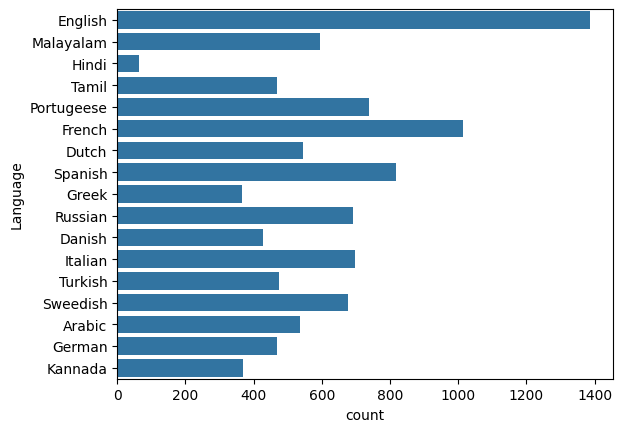

In [ ]:
sns.countplot(df['Language'])

In [ ]:
text=df.Text

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
  for punct in string.punctuation:
    text=text.replace(punct,'')
  return text

In [ ]:
text.apply(remove_punct)

0         Nature in the broadest sense is the natural p...
1        Nature can refer to the phenomena of the physi...
2        The study of nature is a large if not the only...
3        Although humans are part of nature human activ...
4        1 The word nature is borrowed from the Old Fre...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

**Vectorization using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
train_data=vec.fit_transform(text)
print(train_data)

  (0, 16925)	1
  (0, 12833)	1
  (0, 24867)	2
  (0, 3809)	1
  (0, 22461)	1
  (0, 13674)	1
  (0, 16915)	1
  (0, 18946)	1
  (0, 15807)	1
  (0, 27569)	1
  (0, 17998)	1
  (0, 25847)	1
  (1, 16925)	1
  (1, 12833)	1
  (1, 24867)	2
  (1, 18946)	1
  (1, 27569)	1
  (1, 4068)	1
  (1, 20888)	1
  (1, 25057)	2
  (1, 18911)	1
  (1, 17617)	1
  (1, 1603)	1
  (1, 1392)	1
  (1, 15023)	1
  :	:
  (10334, 38523)	1
  (10334, 38849)	1
  (10334, 38526)	1
  (10334, 38813)	1
  (10334, 38587)	1
  (10334, 38991)	1
  (10334, 38835)	1
  (10334, 38995)	1
  (10335, 9065)	1
  (10335, 38570)	1
  (10335, 38815)	1
  (10335, 38526)	1
  (10335, 38770)	1
  (10336, 38592)	1
  (10336, 38954)	1
  (10336, 38817)	1
  (10336, 38666)	1
  (10336, 38541)	1
  (10336, 38637)	1
  (10336, 38521)	1
  (10336, 38707)	1
  (10336, 38604)	1
  (10336, 38874)	1
  (10336, 38563)	1
  (10336, 38946)	1


**Split the data into Training & Testing data**

In [ ]:
x=train_data
y=df['Language']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Model Creation**
- LogisticRegression
- KNeighborsClassiﬁer
- Naive_bayes
- SVM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=7)
mnb=MultinomialNB()
svc=SVC()
lst=[knn,mnb,svc]
accuracy=[]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in lst:
   print(i)
   i.fit(x_train,y_train)
   y_pred=i.predict(x_test)
   accuracy.append(accuracy_score(y_test,y_pred))
   print(accuracy_score(y_test,y_pred))
   print(classification_report(y_test,y_pred))
   print('*'*100)

KNeighborsClassifier(n_neighbors=7)
0.4455190199871051
              precision    recall  f1-score   support

      Arabic       1.00      0.28      0.44       165
      Danish       0.97      0.46      0.62       123
       Dutch       0.96      0.46      0.62       175
     English       0.99      0.49      0.65       435
      French       0.77      0.53      0.63       309
      German       0.98      0.41      0.58       135
       Greek       1.00      0.43      0.60       102
       Hindi       1.00      0.50      0.67        20
     Italian       0.94      0.37      0.53       217
     Kannada       0.06      1.00      0.11       101
   Malayalam       1.00      0.53      0.69       184
  Portugeese       0.99      0.41      0.58       205
     Russian       0.91      0.15      0.26       200
     Spanish       0.84      0.48      0.61       246
    Sweedish       0.94      0.37      0.53       193
       Tamil       0.70      0.79      0.74       145
     Turkish       1.00   

**Visualize Model Comparison**

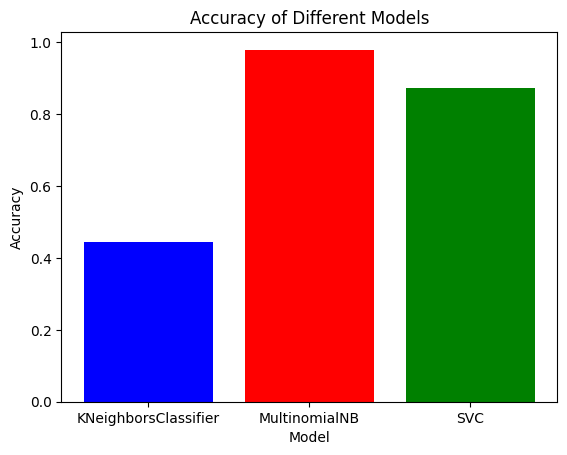

In [ ]:
plt.bar(['KNeighborsClassifier','MultinomialNB','SVC'],accuracy,color=['blue','red','green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

**Model Predictive System**

In [ ]:
language=input('Enter the text: ')
language=remove_punct(language)
language=vec.transform([language])
prediction=mnb.predict(language)
print('The predicted language is:',prediction)

Enter the text: മനുഷ്യനിർമിതമായ വസ്തുക്കളെ പ്രകൃതിയുടെ ഭാഗമായി...	
The predicted language is: ['Malayalam']


In [ ]:
language=input('Enter the text: ')
language=remove_punct(language)
language=vec.transform([language])
prediction=mnb.predict(language)
print('The predicted language is:',prediction)

Enter the text: Nature, in the broadest sense, is the natural...	
The predicted language is: ['English']


In [ ]:
language=input('Enter the text: ')
language=remove_punct(language)
language=vec.transform([language])
prediction=mnb.predict(language)
print('The predicted language is:',prediction)

Enter the text:        "ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ.",
The predicted language is: ['Kannada']
